# Project Productie Proces
- Carlo Dieltjens - Raf Mesotten - Yannick Pottiez
- April 2024

### Stap 4: Lezen van gegevens in Python

#### Import necessary external libraries

In [13]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt 
import scipy.stats as stats

#### Define input and output paths

In [2]:
# mappenstructuur: projectmap > data > input
input_path = os.path.join('..', 'data', 'input')

# mappenstructuur: projectmap > data > output
output_path = os.path.join('..', 'data', 'output')

# absolute_path = os.path.abspath(input_path)
# print(absolute_path)

In [3]:
df = pd.read_json(os.path.join(input_path, 
                               'data_productie', 
                               'daily_production', 
                               'BRU', 
                               '20180101.json'), 
                  orient='index')
df

,0
DoW,Monday
hour,1
minute,0
date,01-01-2018 00:00:00.0000
maintenance,No
prod_loss,61
prod_loss_perc,5
production,1183


In [4]:
# Definieer het pad naar de map met de JSON-bestanden
map_pad = os.path.join(input_path, 'data_productie', 'daily_production', 'BRU')

# Lijst om DataFrames van alle JSON-bestanden op te slaan
dataframes = []

# Itereer over alle bestanden in de map
for bestandsnaam in os.listdir(map_pad):
    if bestandsnaam.endswith(".json"):  # Alleen JSON-bestanden verwerken
        # Volledig pad naar het JSON-bestand
        volledig_pad = os.path.join(map_pad, bestandsnaam)
        
        # JSON-bestand inlezen als DataFrame
        with open(volledig_pad, 'r') as f:
            json_data = json.load(f)
            df = pd.DataFrame([json_data])
        
        # DataFrame toevoegen aan de lijst
        dataframes.append(df)

# Concateneren van alle DataFrames tot één DataFrame
BRU_df = pd.concat(dataframes, ignore_index=True)

# Weergave van het samengevoegde DataFrame
BRU_df


,DoW,hour,minute,date,maintenance,prod_loss,prod_loss_perc,production
0,Monday,1,0,01-01-2018 00:00:00.0000,No,61,5,1183
1,Tuesday,1,0,01-02-2018 00:00:00.0000,No,106,9,1138
2,Wednesday,1,0,01-03-2018 00:00:00.0000,No,129,10,1115
3,Thursday,1,0,01-04-2018 00:00:00.0000,No,278,22,966
4,Friday,1,0,01-05-2018 00:00:00.0000,No,218,17,1026
...,...,...,...,...,...,...,...,...
1825,Saturday,1,0,12-31-2022 00:00:00.0000,No,203,16,1041
1826,Sunday,1,0,01-01-2023 00:00:00.0000,No,231,19,1013
1827,Monday,1,0,01-02-2023 00:00:00.0000,No,181,15,1063
1828,Tuesday,1,0,01-03-2023 00:00:00.0000,No,198,16,1046


In [5]:
# Afdrukken van de beschikbare kolomnamen met bijbehorende datatypes in het DataFrame
column_datatypes = df.dtypes
print(column_datatypes)

DoW               object
hour               int64
minute             int64
date              object
maintenance       object
prod_loss          int64
prod_loss_perc     int64
production         int64
dtype: object


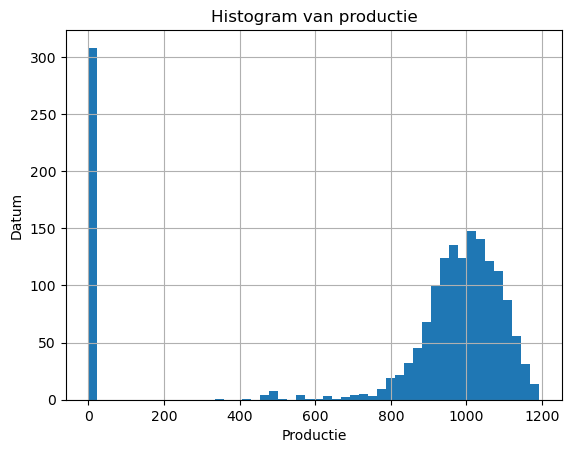

In [6]:
# Histogram van de 'production' kolom
BRU_df['production'] = BRU_df['production'].replace({'#MV': np.nan})  # Vervangt '#MV' door NaN
BRU_df['production'] = BRU_df['production'].astype(float)  # Zorg ervoor dat de kolom numeriek is
BRU_df['production'].hist(bins=50)

# Toon het histogram
plt.title('Histogram van productie')
plt.xlabel('Productie')
plt.ylabel('Datum')
plt.show()

In [7]:
# Definieer het pad naar de map met de JSON-bestanden
map_pad = os.path.join(input_path, 'data_productie', 'daily_production', 'STO')

# Lijst om DataFrames van alle JSON-bestanden op te slaan
dataframes = []

# Itereer over alle bestanden in de map
for bestandsnaam in os.listdir(map_pad):
    if bestandsnaam.endswith(".json"):  # Alleen JSON-bestanden verwerken
        # Volledig pad naar het JSON-bestand
        volledig_pad = os.path.join(map_pad, bestandsnaam)
        
        # JSON-bestand inlezen als DataFrame
        with open(volledig_pad, 'r') as f:
            json_data = json.load(f)
            df = pd.DataFrame([json_data])
        
        # DataFrame toevoegen aan de lijst
        dataframes.append(df)

# Concateneren van alle DataFrames tot één DataFrame
STO_df = pd.concat(dataframes, ignore_index=True)

# Weergave van het samengevoegde DataFrame
STO_df

,DoW,hour,minute,date,maintenance,prod_loss,prod_loss_perc,production
0,Monday,1,0,01-01-2018 00:00:00.0000,No,9,3,265
1,Tuesday,1,0,01-02-2018 00:00:00.0000,No,9,3,265
2,Wednesday,1,0,01-03-2018 00:00:00.0000,No,18,6,256
3,Thursday,1,0,01-04-2018 00:00:00.0000,No,22,8,252
4,Friday,1,0,01-05-2018 00:00:00.0000,No,31,11,243
...,...,...,...,...,...,...,...,...
1825,Saturday,1,0,12-31-2022 00:00:00.0000,No,51,19,223
1826,Sunday,1,0,01-01-2023 00:00:00.0000,No,53,20,221
1827,Monday,1,0,01-02-2023 00:00:00.0000,No,61,22,213
1828,Tuesday,1,0,01-03-2023 00:00:00.0000,No,70,25,204


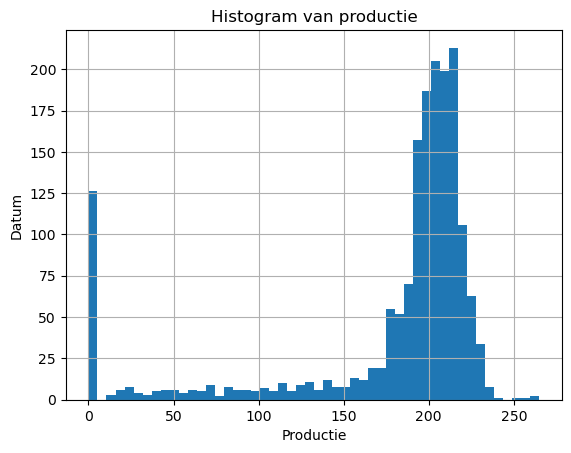

In [8]:
# Histogram van de 'production' kolom
STO_df['production'] = STO_df['production'].replace({'#MV': np.nan})  # Vervangt '#MV' door NaN
STO_df['production'] = STO_df['production'].astype(float)  # Zorg ervoor dat de kolom numeriek is
STO_df['production'].hist(bins=50)

# Toon het histogram
plt.title('Histogram van productie')
plt.xlabel('Productie')
plt.ylabel('Datum')
plt.show()

### Stap 5: Bepaal een geschikte verdeling voor het dagelijkse productieproces

            DoW  hour  minute                      date maintenance prod_loss  \
0        Monday     1       0  01-01-2018 00:00:00.0000          No        61   
1       Tuesday     1       0  01-02-2018 00:00:00.0000          No       106   
2     Wednesday     1       0  01-03-2018 00:00:00.0000          No       129   
3      Thursday     1       0  01-04-2018 00:00:00.0000          No       278   
4        Friday     1       0  01-05-2018 00:00:00.0000          No       218   
...         ...   ...     ...                       ...         ...       ...   
1825   Saturday     1       0  12-31-2022 00:00:00.0000          No       203   
1826     Sunday     1       0  01-01-2023 00:00:00.0000          No       231   
1827     Monday     1       0  01-02-2023 00:00:00.0000          No       181   
1828    Tuesday     1       0  01-03-2023 00:00:00.0000          No       198   
1829  Wednesday     1       0  01-04-2023 00:00:00.0000          No       171   

     prod_loss_perc  produc

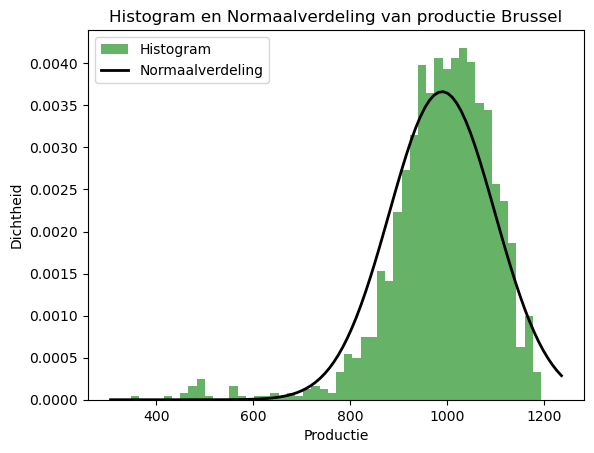

            DoW  hour  minute                      date maintenance prod_loss  \
0        Monday     1       0  01-01-2018 00:00:00.0000          No         9   
1       Tuesday     1       0  01-02-2018 00:00:00.0000          No         9   
2     Wednesday     1       0  01-03-2018 00:00:00.0000          No        18   
3      Thursday     1       0  01-04-2018 00:00:00.0000          No        22   
4        Friday     1       0  01-05-2018 00:00:00.0000          No        31   
...         ...   ...     ...                       ...         ...       ...   
1825   Saturday     1       0  12-31-2022 00:00:00.0000          No        51   
1826     Sunday     1       0  01-01-2023 00:00:00.0000          No        53   
1827     Monday     1       0  01-02-2023 00:00:00.0000          No        61   
1828    Tuesday     1       0  01-03-2023 00:00:00.0000          No        70   
1829  Wednesday     1       0  01-04-2023 00:00:00.0000          No        69   

     prod_loss_perc  produc

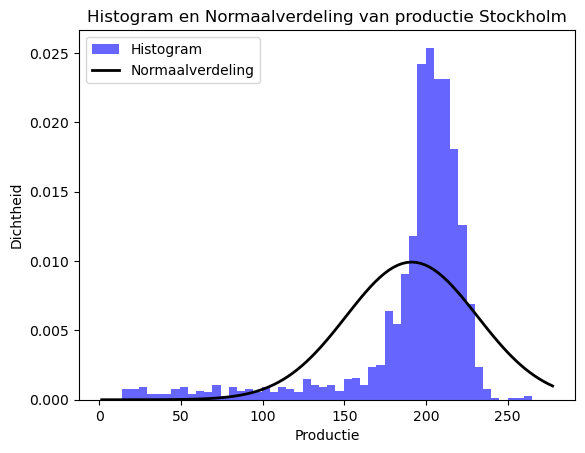

In [19]:
# Filteren op maintenance en production voor BRU_df
BRU_prod_df = BRU_df[(BRU_df['maintenance'] == 'No') & (BRU_df['production'] > 0)]
print(BRU_prod_df)
data_bru = BRU_prod_df['production']
mean_bru, std_bru = stats.norm.fit(data_bru)

# Histogram voor BRU_prod_df
plt.hist(data_bru, bins=50, density=True, alpha=0.6, color='g', label='Histogram')

# Normaalverdeling voor BRU_prod_df
xmin, xmax = plt.xlim()
x_bru = np.linspace(xmin, xmax, 100)
p_bru = stats.norm.pdf(x_bru, mean_bru, std_bru)
plt.plot(x_bru, p_bru, 'k', linewidth=2, label='Normaalverdeling')
plt.title('Histogram en Normaalverdeling van productie Brussel')
plt.xlabel('Productie')
plt.ylabel('Dichtheid')
plt.legend()
plt.show()

# Filteren op maintenance en production voor STO_df
STO_prod_df = STO_df[(BRU_df['maintenance'] == 'No') & (STO_df['production'] > 0)]
print(STO_prod_df)
data_sto = STO_prod_df['production']
mean_sto, std_sto = stats.norm.fit(data_sto)

# Histogram voor STO_prod_df
plt.hist(data_sto, bins=50, density=True, alpha=0.6, color='b', label='Histogram')

# Normaalverdeling voor STO_prod_df
xmin, xmax = plt.xlim()
x_sto = np.linspace(xmin, xmax, 100)
p_sto = stats.norm.pdf(x_sto, mean_sto, std_sto)
plt.plot(x_sto, p_sto, 'k', linewidth=2, label='Normaalverdeling')
plt.title('Histogram en Normaalverdeling van productie Stockholm')
plt.xlabel('Productie')
plt.ylabel('Dichtheid')
plt.legend()
plt.show()



### Stap 6: Simulatieprogramma ontwikkelen

Voer het aantal dagen in voor de simulatie: 7
Gesimuleerde productiewaarden:
Dag 1: 950.0873007953147
Dag 2: 911.8484166188863
Dag 3: 898.2281292170426
Dag 4: 884.0652908077184
Dag 5: 1018.9113851565295
Dag 6: 881.6560460974006
Dag 7: 1053.468336243931


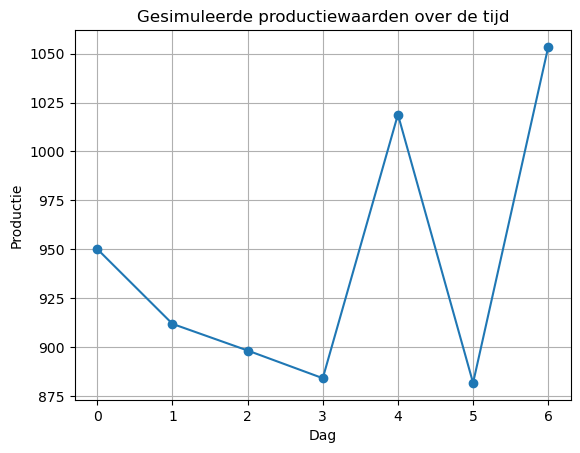

In [21]:
# Functie om de productie te simuleren
def simulate_production(n, mean, std):
    # Genereer een array van normaal verdeelde productiewaarden
    production_values = np.random.normal(mean, std, n)
    
    # Initialiseer een lege lijst om de gesimuleerde producties op te slaan
    simulated_production = []
    
    # Simuleer de productie voor elke dag
    for value in production_values:
        # Bereken de kans op 0 productie met de cumulatieve distributiefunctie (CDF) van de normaalverdeling
        zero_production_prob = stats.norm.cdf(0, loc=value, scale=std)
        
        # Genereer een willekeurige waarde tussen 0 en 1
        random_prob = np.random.rand()
        
        # Bepaal de gesimuleerde productiewaarde op basis van de kans
        if random_prob < zero_production_prob:
            simulated_production.append(0)
        else:
            simulated_production.append(value)
    
    return simulated_production

# Parameters voor de normaalverdeling (gemiddelde en standaarddeviatie)
mean = mean_bru  # Gemiddelde productie
std = std_bru   # Standaarddeviatie van de productie

# Vraag de gebruiker om de duur van de simulatie (n dagen)
n = int(input("Voer het aantal dagen in voor de simulatie: "))

# Simuleer de productie
simulated_data = simulate_production(n, mean, std)

# Toon de gesimuleerde productiewaarden
print("Gesimuleerde productiewaarden:")
for i, value in enumerate(simulated_data, 1):
    print(f"Dag {i}: {value}")

# Plot de gesimuleerde productiewaarden
plt.plot(simulated_data, marker='o')
plt.title('Gesimuleerde productiewaarden over de tijd')
plt.xlabel('Dag')
plt.ylabel('Productie')
plt.grid(True)
plt.show()

